# Explore here

In [1]:
# Your code here
import pandas as pd

datos_medicos = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
datos_medicos.shape

(1338, 7)

In [3]:
datos_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
datos_medicos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
datos_medicos = datos_medicos.drop_duplicates().reset_index(drop = True)
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
datos_medicos.shape

(1337, 7)

In [7]:
datos_medicos.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
datos_medicos.duplicated().sum()

np.int64(0)

In [9]:
datos_medicos = datos_medicos.drop_duplicates().reset_index(drop = True)
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
datos_medicos.duplicated().sum()

np.int64(0)

In [11]:
cat_cols = datos_medicos.select_dtypes(include=['object']).columns.tolist()
num_cols = datos_medicos.select_dtypes(include=['int64', 'float64']).columns.tolist()

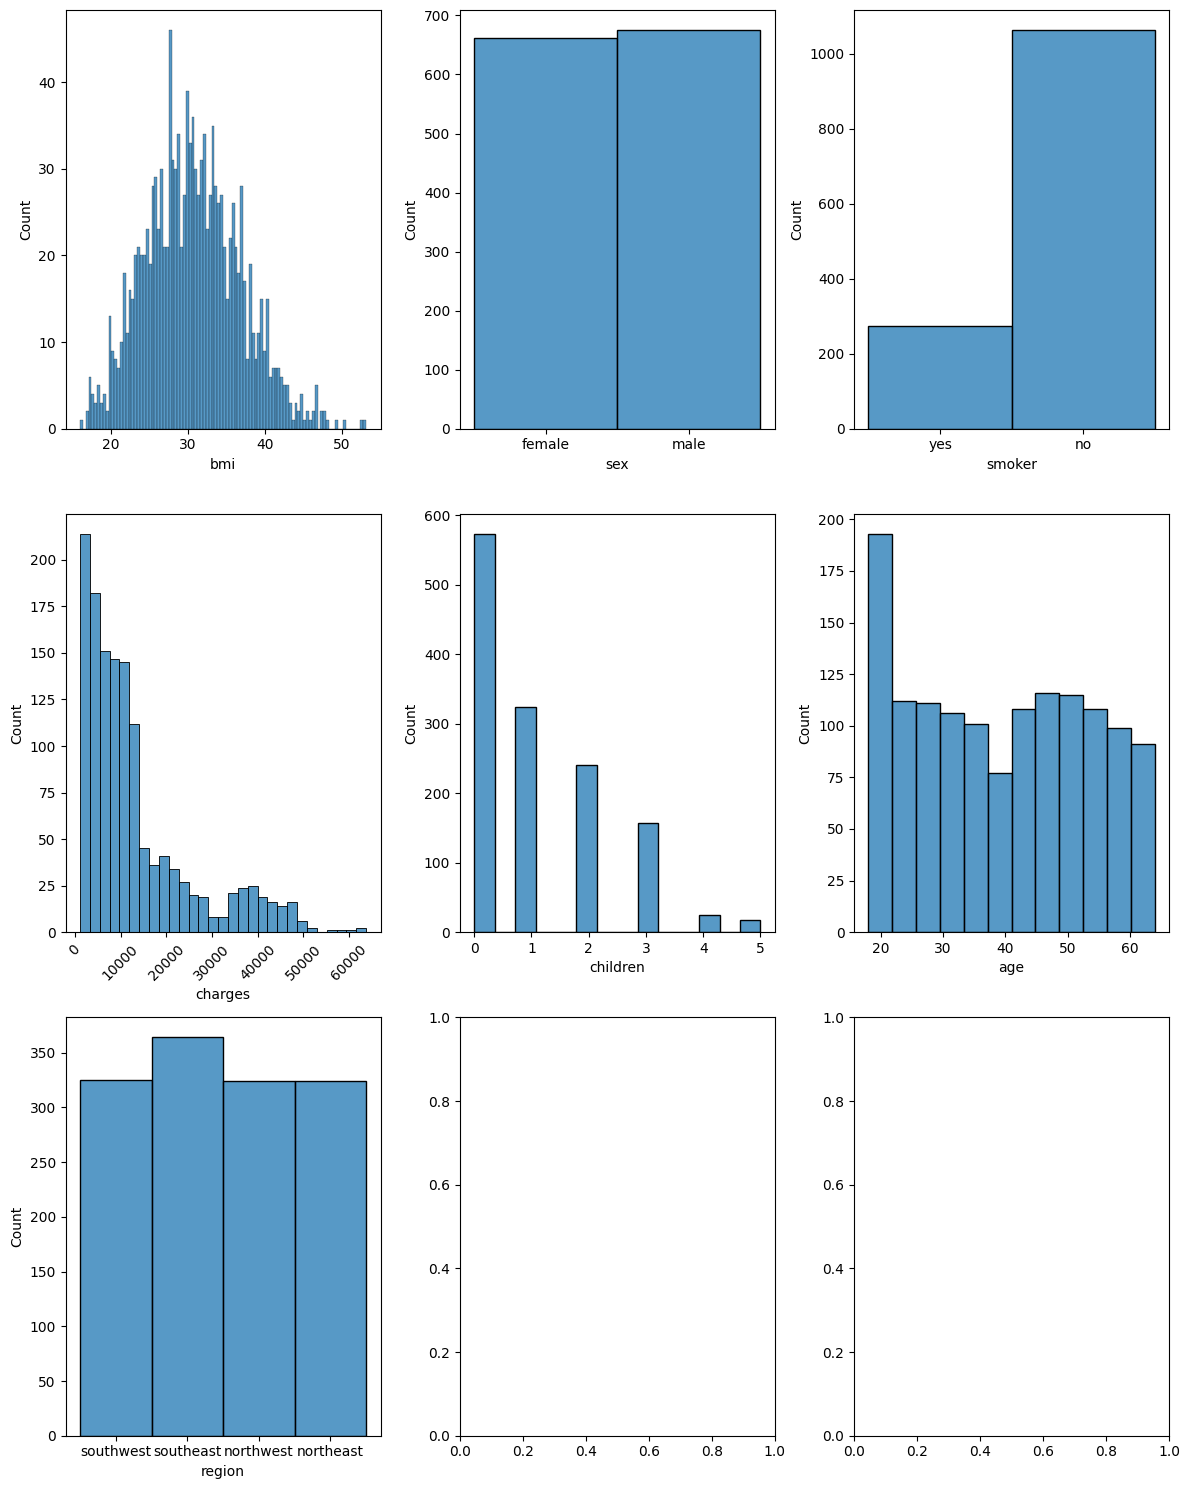

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (12, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datos_medicos, x = "bmi",bins=100)
sns.histplot(ax = axis[0, 1], data = datos_medicos, x = "sex")
sns.histplot(ax = axis[0, 2], data = datos_medicos, x = "smoker")
sns.histplot(ax = axis[1, 0], data = datos_medicos, x = "charges").tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1, 1], data = datos_medicos, x = "children")
sns.histplot(ax = axis[1, 2], data = datos_medicos, x = "age")
sns.histplot(ax = axis[2, 0], data = datos_medicos, x = "region")

plt.tight_layout()

# Mostrar el plot
plt.show()

### Limitare los datos de cargas que sean menos de 60000, con el que no mostraria 10% de datos, calculando los outliers del campo charges.

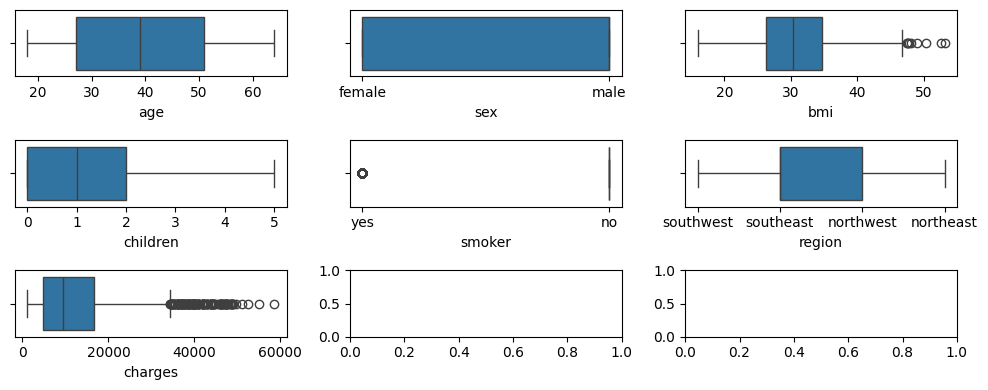

In [13]:
fig, axis = plt.subplots(3, 3, figsize = (10, 4))

dm_charges = datos_medicos[datos_medicos['charges']<60000]

sns.boxplot(ax = axis[0, 0], data = datos_medicos, x = "age")
sns.boxplot(ax = axis[0, 1], data = datos_medicos, x = "sex")
sns.boxplot(ax = axis[0, 2], data = datos_medicos, x = "bmi")
sns.boxplot(ax = axis[1, 0], data = datos_medicos, x = "children")
sns.boxplot(ax = axis[1, 1], data = datos_medicos, x = "smoker")
sns.boxplot(ax = axis[1, 2], data = datos_medicos, x = "region")
sns.boxplot(ax = axis[2, 0], data = dm_charges, x = "charges")

plt.tight_layout()

plt.show()

In [14]:
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
datos_medicos.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Calculo mis outliers, de Charges, para aplicarlo en mi data set para prepararlo antes de normalizarlo.

In [ ]:
Q1 = datos_medicos['charges'].quantile(0.25)
Q3 = datos_medicos['charges'].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
limite_inferior_char = Q1 - 1.5 * IQR
limite_superior_char = Q3 + 1.5 * IQR

outliers = datos_medicos[(datos_medicos['charges'] < limite_inferior_char) | (datos_medicos['charges'] > limite_superior_char)]
datos_limpios = datos_medicos[(datos_medicos['charges'] >= limite_inferior_char) & (datos_medicos['charges'] <= limite_superior_char)]


1198
139


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [83]:
Q1 = datos_medicos['bmi'].quantile(0.25)
Q3 = datos_medicos['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
limite_inferior_char = Q1 - 1.5 * IQR
limite_superior_char = Q3 + 1.5 * IQR

outliers = datos_medicos[(datos_medicos['bmi'] < limite_inferior_char) | (datos_medicos['bmi'] > limite_superior_char)]
datos_limpios = datos_medicos[(datos_medicos['bmi'] >= limite_inferior_char) & (datos_medicos['bmi'] <= limite_superior_char)]


Duplico mi dataframe, para aplicar mis limites de outliers, y empezar a entrenar mi nuevo df. Aplicando estos limites quito 25 datos.

In [56]:
#dm_copia = datos_medicos[datos_medicos['charges']<50000]
dm_copia = datos_medicos[(datos_medicos['charges'] < 50000) & (datos_medicos['bmi'] < 46)]

dm_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1315 non-null   int64  
 1   sex       1315 non-null   object 
 2   bmi       1315 non-null   float64
 3   children  1315 non-null   int64  
 4   smoker    1315 non-null   object 
 5   region    1315 non-null   object 
 6   charges   1315 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


Con todos los valores numericos, y factorizado los numericos, creo mi grafico de mapa de calor.

/tmp/ipykernel_1156/883834509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_copia["sex_n"] = pd.factorize(dm_copia["sex"])[0]
/tmp/ipykernel_1156/883834509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_copia["smoker_n"] = pd.factorize(dm_copia["smoker"])[0]
/tmp/ipykernel_1156/883834509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

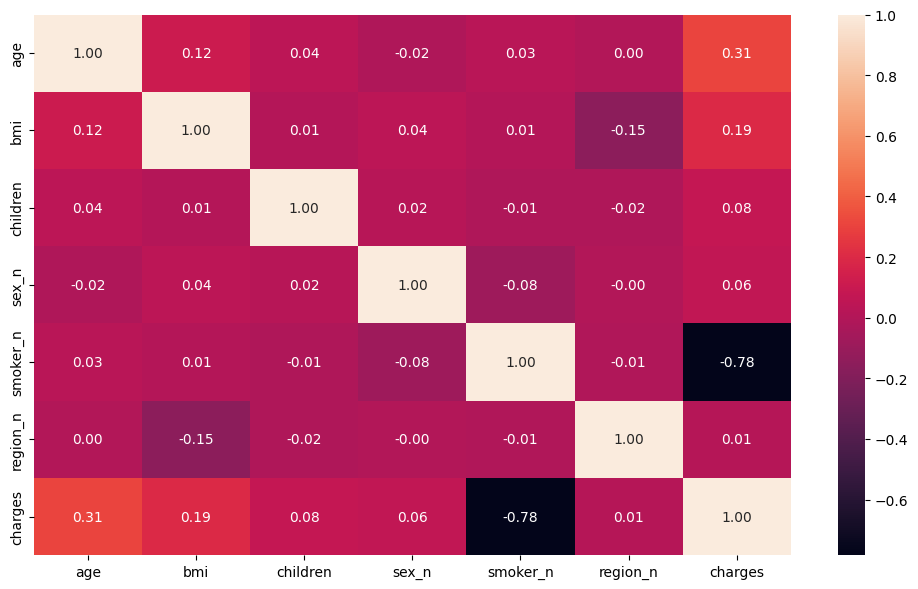

In [57]:
dm_copia["sex_n"] = pd.factorize(dm_copia["sex"])[0]
dm_copia["smoker_n"] = pd.factorize(dm_copia["smoker"])[0]
dm_copia["region_n"] = pd.factorize(dm_copia["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dm_copia[["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Entreno mi modelo

In [58]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dm_copia[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = dm_copia.index, columns = num_variables)
total_data_scal["charges"] = dm_copia["charges"]
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,charges
0,0.021739,0.398798,0.0,0.0,0.0,16884.92400
1,0.000000,0.594856,0.2,1.0,1.0,1725.55230
2,0.217391,0.569138,0.6,1.0,1.0,4449.46200
3,0.326087,0.225284,0.0,1.0,1.0,21984.47061
4,0.304348,0.431530,0.0,1.0,1.0,3866.85520


Separo mis variables X e y, voy a dividir en entrenamiento/prueba, selecciono las 4 variables que más explican el valor de "charges".

In [68]:
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,bmi,children,sex_n,smoker_n
211,0.478261,0.498163,0.8,1.0,1.0
315,0.739130,0.577488,0.0,1.0,1.0
142,0.347826,0.311957,0.4,1.0,0.0
919,0.956522,0.301937,0.0,0.0,1.0
794,0.195652,0.418838,0.0,1.0,0.0


In [69]:
X_test.head()

,age,bmi,children,sex_n,smoker_n
200,0.021739,0.539412,0.0,0.0,1.0
1182,0.652174,0.380762,0.2,0.0,1.0
888,0.847826,0.590180,0.2,1.0,1.0
292,0.152174,0.987976,0.4,1.0,0.0
186,0.173913,0.466266,0.4,0.0,1.0


Guardo un dos csv para datos de entrenamiento y otro de prueba.

In [73]:
# Guardar a archivos CSV
X_train["charges"] = y_train.values
X_test["charges"] = y_test.values
X_train.to_csv("../data/interim/datos_entrenamiento.csv", index = False)
X_test.to_csv("../data/interim/datos_prueba.csv", index = False)

datos_entrenamiento = pd.read_csv("../data/interim/datos_entrenamiento.csv")
datos_prueba = pd.read_csv("../data/interim/datos_prueba.csv")

datos_entrenamiento.head()

print("Tamaño del set de entrenamiento:", datos_entrenamiento.shape)
print("Tamaño del set de prueba:", datos_prueba.shape)

Tamaño del set de entrenamiento: (1052, 6)
Tamaño del set de prueba: (263, 6)


In [74]:
datos_entrenamiento.head()

,age,bmi,children,sex_n,smoker_n,charges
0,0.478261,0.498163,0.8,1.0,1.0,8162.71625
1,0.739130,0.577488,0.0,1.0,1.0,9722.76950
2,0.347826,0.311957,0.4,1.0,0.0,18972.49500
3,0.956522,0.301937,0.0,0.0,1.0,13451.12200
4,0.195652,0.418838,0.0,1.0,0.0,18310.74200


Los datos los representamos en un seaborn, visualizando la relación entre ciertas variables independientes y la variable objetivo "charges"

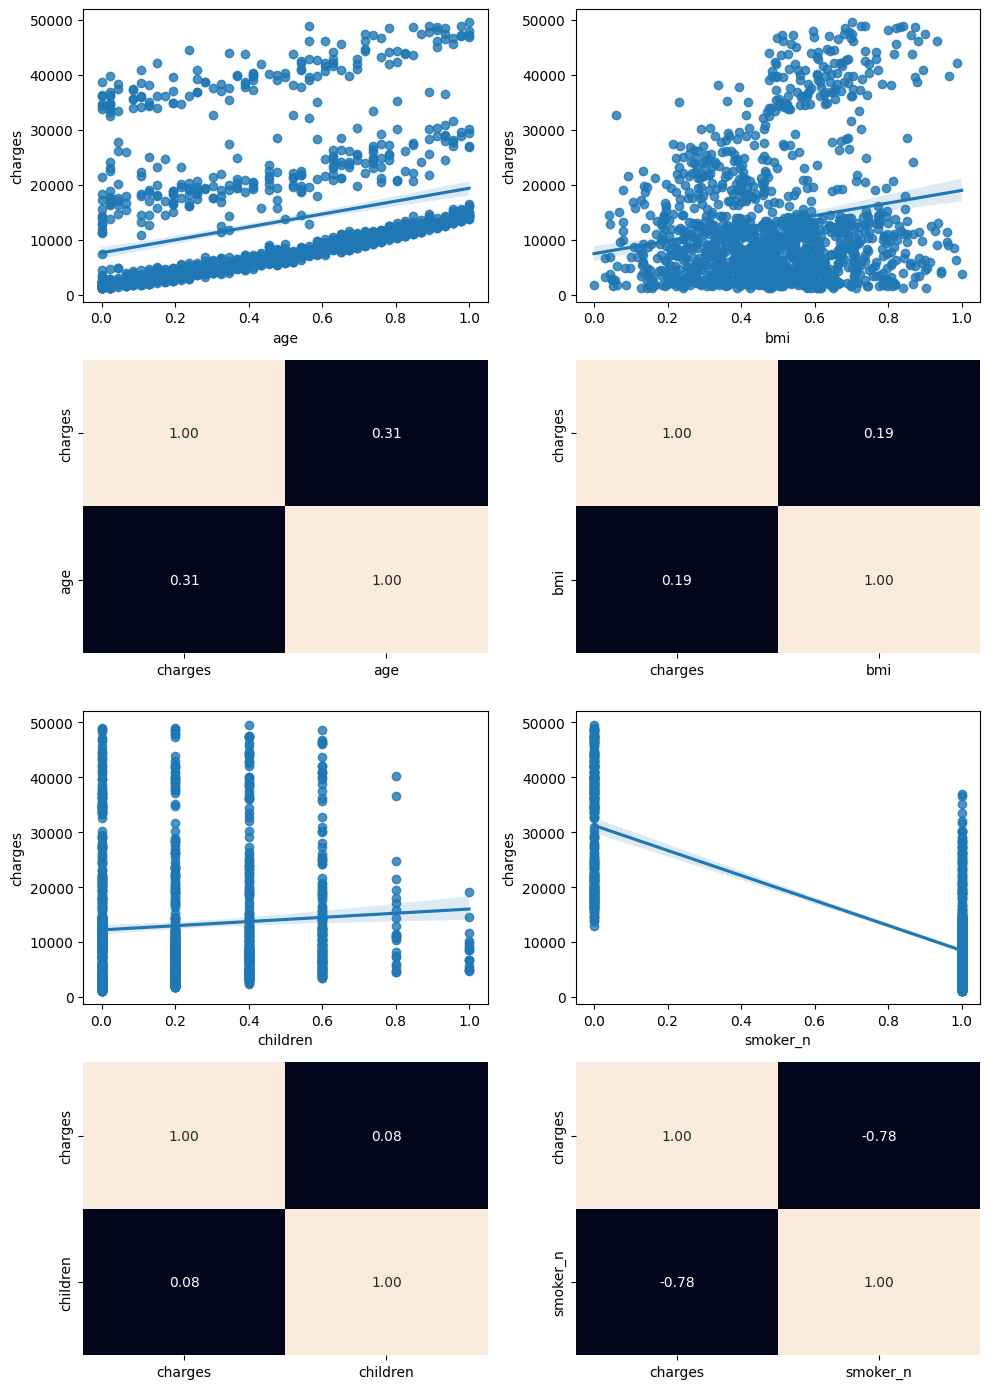

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([datos_entrenamiento, datos_prueba])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [76]:
X_train = datos_entrenamiento.drop(["charges"], axis = 1)
y_train = datos_entrenamiento["charges"]

X_test = datos_prueba.drop(["charges"], axis = 1)
y_test = datos_prueba["charges"]

Preparo mis datos para la regresion lineal

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# modelo
reg_lin = LinearRegression()

reg_lin.fit(X_train, y_train)

print(f"Intercepto (a): {reg_lin.intercept_}")
print(f"Coeficientes (b1, b2): {reg_lin.coef_}")

Intercepto (a): 21045.414062380238
Coeficientes (b1, b2): [ 11656.51603722   9328.00202762   3313.55628812   -158.49496183
 -23303.9147376 ]


In [78]:
y_pred = reg_lin.predict(X_test)
y_pred

array([ 3026.5395476 ,  9558.03051787, 13633.61760142, 33202.00095623,
        5443.47095514,  9947.86424107, 27440.5587395 , 10742.19150837,
        4440.37290857,  1627.80777636, 11439.47390808, 13461.09181695,
        2759.65236547,  6037.93859935, 34004.04722248,  9171.83806973,
       10506.58247368, 13607.51370489, 23564.87418758, 14449.7623924 ,
       11995.34526847,  8867.77586309, 32902.84646256,  5999.25526622,
        7927.77509394,  8145.72702454, 10664.33672072,  9301.08676088,
       11493.21467699, 25273.01452589, 26301.02306637, 16878.88612218,
        2220.28118918, 36021.41855885, 35881.88036076, 16165.42170524,
       32994.58366417,   582.894732  , 10938.62473494,   689.89471382,
        2151.58177973,  9989.65457163, 16131.78370107, 25679.30117104,
       10316.28365447,  4695.44071612,  3868.25817158,  7994.67158923,
       14125.35007763, 30409.46556665, 10590.09854091,  7993.87062098,
        7823.39930817,  3324.52324675, 27010.04634588, 14401.32382997,
      

He podido mejorarlo en un 3% mi coeficiente, al aplicar una prueba de outliers de limite de 55000 en Charges y bmi a 46. Mi coeficiente tiene un 70%, bastante bien. He aplicado 2 outliers.

In [79]:
mse_rl = mean_squared_error(y_test, y_pred)
#rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print("MSE: ", mse_rl)
#print("RMSE: ", rmse_rl)
print("Coeficiente de determinación: ", r2_rl)

MSE:  35085371.9380668
Coeficiente de determinación:  0.7055593830104818
